In [1]:
import numpy as np
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt

In [2]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

In [3]:
## clean up column labels a little bit
train_df = train_df.drop('Unnamed: 0', axis=1).set_index('index')
test_df = test_df.drop('Unnamed: 0', axis=1).set_index('index')

### Convert categorical data to numeric and separate target feature for training data

In [4]:
# Drop the label to create the X data
X_train = train_df.drop('loan_status', axis=1)
# One-hot encoding the entire dataframe
X_train_dummies = pd.get_dummies(X_train)
# Converting output labels to 0 and 1
y_train = LabelEncoder().fit_transform(train_df['loan_status'])

### Convert categorical data to numeric and separate target feature for testing data

In [5]:
# Drop the label to create the X data
X_test = test_df.drop('loan_status', axis=1)
# One-hot encoding the entire dataframe
X_test_dummies = pd.get_dummies(X_test)
# Converting output labels to 0 and 1
y_test = LabelEncoder().fit_transform(test_df['loan_status'])

### Add missing dummy variables to testing set

In [6]:
# borrowed from https://stackoverflow.com/questions/41335718/keep-same-dummy-variable-in-training-and-testing-data
# Get missing columns in the training test
missing_cols = set( X_train_dummies.columns ) - set( X_test_dummies.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X_test_dummies[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
X_test_dummies = X_test_dummies[X_train_dummies.columns]

### Prediction 
I believe that, since we have a high number of explanatory variables in our dataset, that the random forest model should perform better than the logistic regression. However, I believe that if we had fewer dimensions to our dataset, it's possible that the logistic regression would perform similarly to the random forest classification.

### Train the Logistic Regression model on the unscaled data and print the model score

In [7]:
classifier = LogisticRegression()
classifier.fit(X_train_dummies, y_train)

C:\Users\sceli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
print(f"Training Data Score: {classifier.score(X_train_dummies, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_dummies, y_test)}")

Training Data Score: 0.6507389162561577
Testing Data Score: 0.5168013611229264


### Train a Random Forest Classifier model and print the model score

In [9]:
clf_1 = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_dummies, y_train)
print(f'Training Score: {clf_1.score(X_train_dummies, y_train)}')
print(f'Testing Score: {clf_1.score(X_test_dummies, y_test)}')

Training Score: 1.0
Testing Score: 0.6433432581880051


### Results
Although neither model had a particularly high (or, rather, satisfactory) accuracy score, I was correct in suggesting the random forest model would perform better. Whether that is due to my explanation, though, is unknown.

### Scale the data

In [10]:
scaler = StandardScaler().fit(X_train_dummies)
X_train_scaled = scaler.transform(X_train_dummies)
X_test_scaled = scaler.transform(X_test_dummies)

### Train the Logistic Regression model on the scaled data and print the model score

In [11]:
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)

C:\Users\sceli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Prediction
Again, I think that the random forest model will perform better than the logistic regression. However, scaling the data may help our logistic regression perform better than the previous model. In either case, I feel that scaling the data will benefit both models.

In [12]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.7078817733990148
Testing Data Score: 0.767333049766057


### Train a Random Forest Classifier model on the scaled data and print the model score

In [13]:
clf_2 = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf_2.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf_2.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.6420672054444917


### Results
It appears that my prediction was wrong. The logistic regression actually outperformed the random forest model. Scaling the data didn't seem to have any affect on the accuracy of the random forest model's ability to perform predictions.

[1.62679463e-02 3.45485047e-02 2.98657372e-02 1.46144695e-02
 1.61086591e-02 2.93790795e-03 4.24775904e-03 8.90605979e-03
 1.45871591e-03 1.52099714e-02 1.18468431e-02 2.94155218e-02
 2.94587834e-02 4.35297967e-02 4.38158387e-02 5.11266480e-02
 4.85751463e-02 1.63380968e-02 0.00000000e+00 0.00000000e+00
 9.50429837e-02 7.68347729e-04 0.00000000e+00 4.85641668e-06
 4.48273778e-03 1.36502159e-02 4.70734340e-03 6.36931003e-03
 4.11118884e-03 6.44932197e-03 1.19289920e-02 1.35889955e-02
 1.40696769e-02 4.83647186e-03 7.45463259e-03 1.69871914e-02
 1.33222729e-02 1.54842126e-02 6.50752036e-03 6.72380732e-03
 7.94603986e-03 9.50606273e-03 1.41975228e-02 1.57105454e-02
 1.44976314e-02 2.61747130e-04 1.10129617e-06 1.58065408e-02
 1.70075638e-02 1.19802666e-02 1.00446397e-02 5.62887191e-03
 1.33503761e-02 1.21188589e-02 3.46059741e-03 6.97577709e-03
 7.79427623e-03 7.60433284e-03 9.23415471e-03 1.09188155e-02
 8.62871111e-03 1.02816420e-02 7.63861169e-03 8.86113480e-03
 0.00000000e+00 1.050991

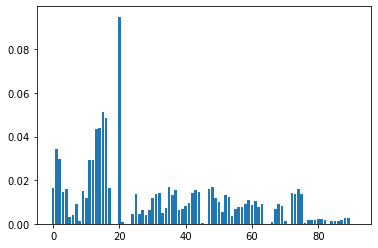

In [14]:
features = clf_2.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()